# Part f): Cross-validation as resampling techniques, adding more complexity

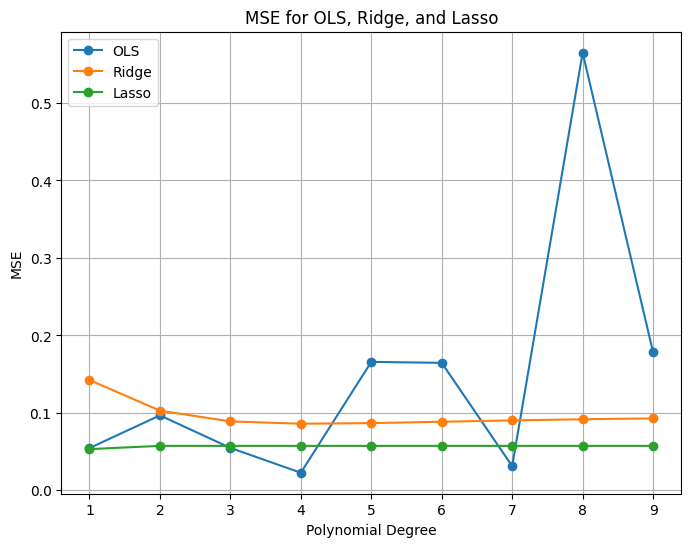

In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# Generate the Franke function data
np.random.seed(2022)
x = np.arange(0, 1, 0.05)
y = np.arange(0, 1, 0.05)
z = FrankeFunction(x, y)

# Define the range of polynomial degrees to test
degrees = np.arange(1, 10)

# Define the number of folds
k_folds = 10

# Initialize arrays to store the MSE values
mse_ols = np.zeros_like(degrees, dtype=float)
mse_ridge = np.zeros_like(degrees, dtype=float)
mse_lasso = np.zeros_like(degrees, dtype=float)

# Perform k-fold cross-validation for each degree
for i, degree in enumerate(degrees):
    # Create polynomial features
    poly_features = PolynomialFeatures(degree=degree)
    X = poly_features.fit_transform(np.column_stack((x, y)))
    
    # Perform k-fold cross-validation for ordinary least squares
    model_ols = LinearRegression()
    mse_ols[i] = -np.mean(cross_val_score(model_ols, X, z, cv=k_folds, scoring='neg_mean_squared_error'))
    
    # Perform k-fold cross-validation for Ridge regression
    model_ridge = Ridge(alpha=10)  # You can adjust the alpha value
    mse_ridge[i] = -np.mean(cross_val_score(model_ridge, X, z, cv=k_folds, scoring='neg_mean_squared_error'))
    
    # Perform k-fold cross-validation for Lasso regression
    model_lasso = Lasso(alpha=0.01)  # You can adjust the alpha value
    mse_lasso[i] = -np.mean(cross_val_score(model_lasso, X, z, cv=k_folds, scoring='neg_mean_squared_error'))


# Define the range of polynomial degrees
degrees = np.arange(1, 10)

# Plot the MSE values
plt.figure(figsize=(8, 6))
plt.plot(degrees, mse_ols, label='OLS', marker='o')
plt.plot(degrees, mse_ridge, label='Ridge', marker='o')
plt.plot(degrees, mse_lasso, label='Lasso', marker='o')
plt.xlabel('Polynomial Degree')
plt.ylabel('MSE')
plt.title('MSE for OLS, Ridge, and Lasso')
plt.legend()
plt.grid(True)
plt.show()
